In [3]:
import numpy as np
import pandas as pd

df_signal = pd.read_csv("signaali.csv")
df_signal.head()

,Aika,Signaali
0,0.023641,-0.312650
1,0.031545,-0.273663
2,0.039449,-0.238305
3,0.047353,-0.085638
4,0.055288,-0.172576


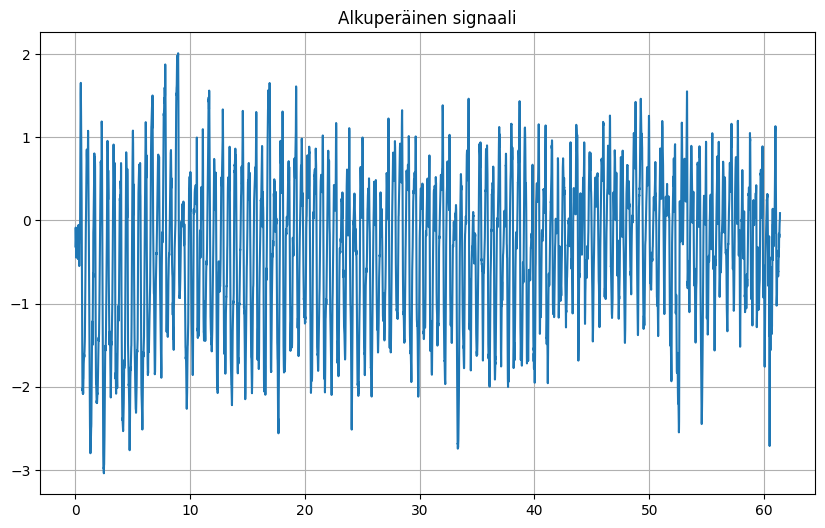

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_signal['Aika'],df_signal['Signaali'])
plt.grid()
#plt.xlim([0, 10]) #Zoomaa tietoja ensimmäiseltä 10s
plt.title('Alkuperäinen signaali')
plt.show()

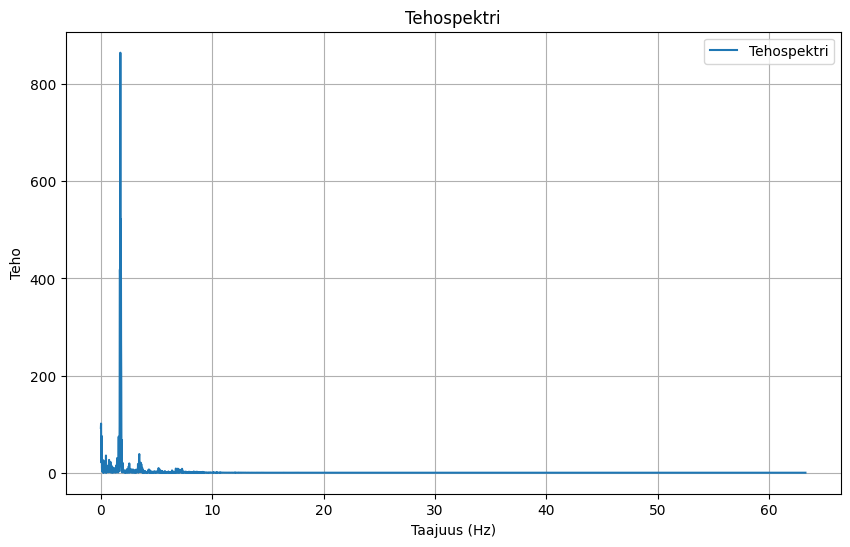

Tehokkain taajuus: 1.76 Hz


In [39]:
import numpy as np
import matplotlib.pyplot as plt

t = df_signal['Aika']
f = df_signal['Signaali'].values

# Fourier muunnos
N = len(f)  # Datapisteiden lukumäärä signaalissa
dt = t[1] - t[0]  # Näytteenottoväli, datapisteiden ajallinen välimatka

fourier = np.fft.fft(f, N)

# Tehospektri
psd = 2.0 / N * np.abs(fourier) ** 2


#Taajuudet
freq = np.fft.fftfreq(N, dt)
L = np.arange(1, np.floor(N / 2), dtype='int')  


plt.figure(figsize=(10, 6))
plt.plot(freq[L], psd[L], label='Tehospektri')
plt.grid()
plt.title('Tehospektri')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.legend()
plt.show()

# Dominoiva taajuus:
tehokkain_taajuus_indeksi = np.argmax(psd[L])
tehokkain_taajuus = freq[L][tehokkain_taajuus_indeksi]

print(f"Tehokkain taajuus: {tehokkain_taajuus:.2f} Hz")


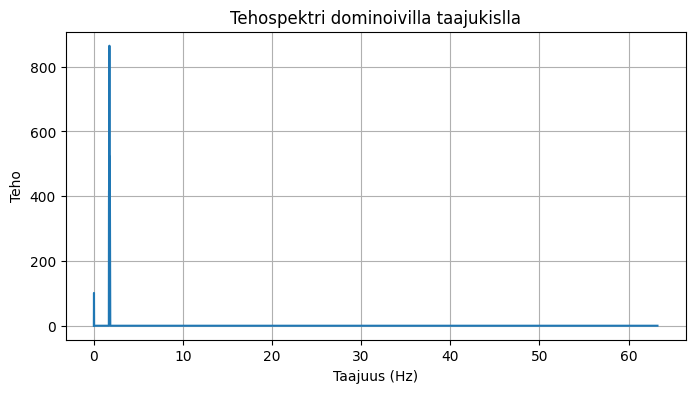

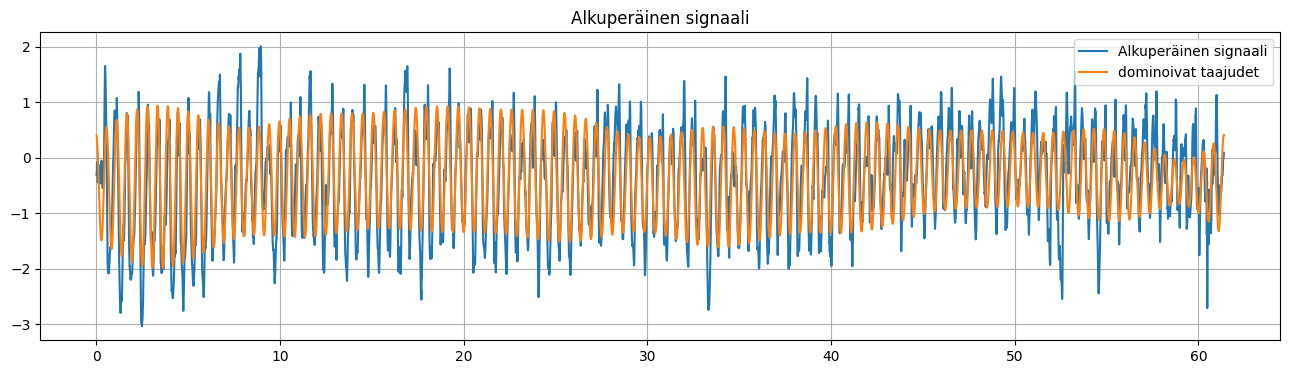

0 Hz komponentti (DC): 2048.6117889063567


In [40]:

fourier_dom = fourier.copy()
fourier_dom[psd<100] = 0


#Tehospektri: 
#psd_dom = fourier*np.conj(fourier_dom) / N
psd_dom = 2.0 / N * np.abs(fourier_dom) ** 2


#freq = 1/(dt*N)*np.arange(N) #Taajuudet

PSD_dom = np.array([freq[L], psd_dom[L].real]) #Taajudet ja tehospektrin arvot


plt.figure(figsize=(8,4))
plt.plot(PSD_dom[0,:], PSD_dom [1,:])
plt.grid()
plt.title('Tehospektri dominoivilla taajukislla')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.show()

signal_dom = np.fft.ifft(fourier_dom).real
plt.figure(figsize=(16,4))
plt.plot(df_signal['Aika'],df_signal['Signaali'])
plt.plot(df_signal['Aika'], signal_dom)
plt.legend(['Alkuperäinen signaali',  'dominoivat taajudet'])
plt.grid()
#plt.xlim([0, 10]) #Zoomaa tietoja ensimmäiseltä 10s
plt.title('Alkuperäinen signaali')
plt.show()

print(f"0 Hz komponentti (DC): {psd[0]}")


In [ ]:
 
'''
t = df_signal['Aika'].values
f = df_signal['Signaali'].values

#Fourier muunnos

N = len(f) #Datapisteiden lukumäärä signaalissa
dt = t[1] - t[0] #Näytteenottoväli, datapisteiden ajallinen välimatka

fourier = np.fft.fft(f, N)

#Tehospektri: 
psd = fourier*np.conj(fourier) / N

#freq = 1/(dt*N)*np.arange(N) #Taajuudet
freq = np.fft.fftfreq(N,dt)
L = np.arange(1, np.floor(N/2), dtype='int') # määritetyt tehospektrin arvot
PSD = np.array([freq[L], psd[L].real]) #Taajudet ja tehospektrin arvot

plt.figure(figsize=(10,6))
plt.plot(PSD[0,:], PSD [1,:])
plt.grid()
plt.title('Tehospektri')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.legend()
plt.show()

tehokkain_taajuus_indeksi = np.argmax(psd[L].real)
tehokkain_taajuus = freq[L][tehokkain_taajuus_indeksi]

print(f"Tehokkain taajuus: {tehokkain_taajuus:.2f} Hz")

'''